In [15]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
from sklearn import datasets             #datasets lib
import numpy as np 

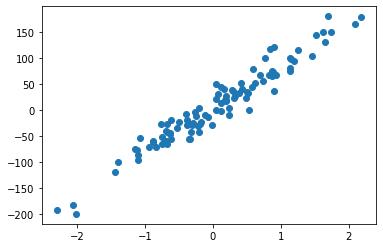

In [42]:
#Data creation
x_samples , y_samples = datasets.make_regression(n_samples=100 , n_features=1 , noise=20 , random_state=1)
x = torch.from_numpy(x_samples.astype(np.float32))
y = torch.from_numpy(y_samples.astype(np.float32))
y = y.reshape(-1,1)  #or (y.shape,1)

plt.scatter(x,y)
plt.show()

n_samples , n_features = x.shape

In [43]:
#Model 
input_size = n_features
output_size = n_features
model = nn.Linear(input_size,output_size)

In [44]:
#Training Config
Loss = nn.MSELoss()
Learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters() , lr=Learning_rate)

In [45]:
#Training 
epochs = 1000
for epoch in range(epochs):
  #forward :
  y_hat = model(x)
  loss = Loss(y,y_hat)
  #backward :
  loss.backward()
  #update:
  optimizer.step()
  optimizer.zero_grad() 

(100, 1)
(100,)


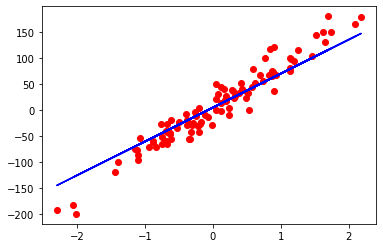

In [55]:
#plot th results
y_predicted = model(x)
y_predicted = y_predicted.detach().numpy()
print(y_predicted.shape)
print(y_samples.shape)

plt.plot(x_samples , y_samples , 'ro')
plt.plot(x_samples , y_predicted , 'b')